In [92]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Load the dataset
data = pd.read_csv('heart.csv')

In [94]:
# Display the first few rows of the dataset
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [95]:
# Check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [96]:
# Split data into features and target
X = data.drop('target', axis=1)  # Features (assuming 'target' is the column name for the labels)
y = data['target']  # Target variable

In [97]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=40)

In [98]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [99]:
# Initialize the model
model = RandomForestClassifier(n_estimators=2000, random_state=50)

In [100]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2000, random_state=50)

In [101]:
# Make predictions
y_pred = model.predict(X_test)

In [102]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 86.89%
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

Confusion Matrix:
[[24  4]
 [ 4 29]]


In [103]:
# Save the trained model to a file
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [104]:
with open('heart_disease_model_pickle.pkl', 'wb') as file:
    pickle.dump(model, file)

In [105]:
loaded_model_joblib = joblib.load('heart_disease_model.pkl')

In [106]:
# Load the model from a file using pickle
with open('heart_disease_model_pickle.pkl', 'rb') as file:
    loaded_model_pickle = pickle.load(file)

In [107]:
# Verify that the loaded models work as expected
loaded_y_pred_joblib = loaded_model_joblib.predict(X_test)
loaded_y_pred_pickle = loaded_model_pickle.predict(X_test)

In [108]:
print(f'Joblib Model Accuracy: {accuracy_score(y_test, loaded_y_pred_joblib) * 100:.2f}%')
print(f'Pickle Model Accuracy: {accuracy_score(y_test, loaded_y_pred_pickle) * 100:.2f}%')

Joblib Model Accuracy: 86.89%
Pickle Model Accuracy: 86.89%


In [109]:
# Visualize the confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

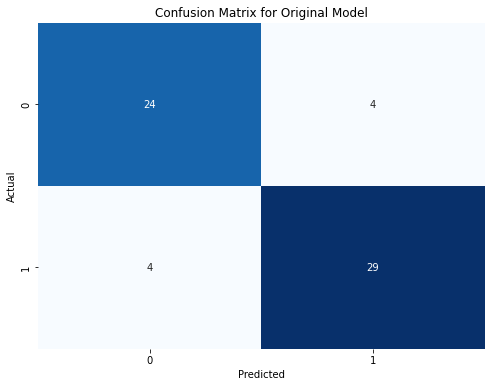

In [110]:
plot_confusion_matrix(conf_matrix, title='Confusion Matrix for Original Model')

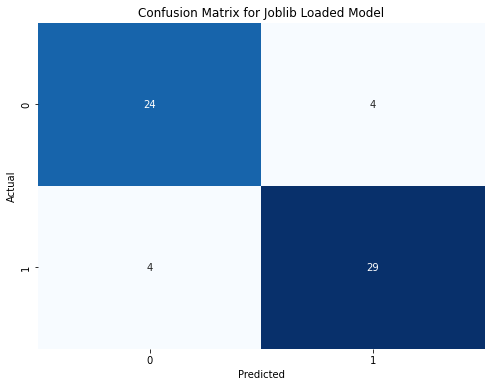

In [111]:
# Plot confusion matrix for the joblib loaded model
conf_matrix_joblib = confusion_matrix(y_test, loaded_y_pred_joblib)
plot_confusion_matrix(conf_matrix_joblib, title='Confusion Matrix for Joblib Loaded Model')

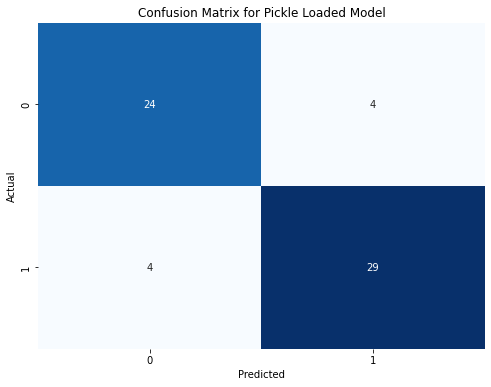

In [112]:
# Plot confusion matrix for the pickle loaded model
conf_matrix_pickle = confusion_matrix(y_test, loaded_y_pred_pickle)
plot_confusion_matrix(conf_matrix_pickle, title='Confusion Matrix for Pickle Loaded Model')